<a href="https://colab.research.google.com/github/AndreiAf02/Transfer_Learning_Extension/blob/main/Adult_Performance_Analysis_Extension.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm
import seaborn as sns
import pandas as pd

In [2]:
path_to_data = 'https://raw.githubusercontent.com/AndreiAf02/Transfer_Learning_Extension/main/'

In [3]:
def perf_metrics(data, label):
    data_len = len(data)
    # print('Number of iterations:', data_len)
    mean = np.mean(data[label])
    var = np.var(data[label], ddof=1)
    var_mean = var/data_len

    se_mean = np.sqrt(var_mean)
    error_bound = 1.96*se_mean
    CI_low = mean - error_bound
    CI_high = mean + error_bound

    print('Error type:', label)
    print('Mean:', mean)
    print('Variance:', var)
    print('Variance of estimate:', var_mean)
    print('Standard error:', se_mean)
    print('95% Confidence Interval:  [', CI_low, ', ', CI_high, ']')
    print('-----------------------------')


Loading the performance data for the six sampling methods (plus original imbalanced data) collected from fine-tuning for heart disease prediction:

In [ ]:
# data_orig = pd.read_csv("Credit_Imbalanced_Fine_Tuning.csv", sep=",", header=0)
# data_SRS = pd.read_csv("Credit_SRS_Fine_Tuning.csv", sep=",", header=0)
# data_SRSwR = pd.read_csv("Credit_SRSwR_Fine_Tuning.csv", sep=",", header=0)
# data_Sy = pd.read_csv("Credit_Sy_Fine_Tuning.csv", sep=",", header=0)
# data_Sym = pd.read_csv("Credit_Sy_multi_Fine_Tuning.csv", sep=",", header=0)
# data_SRS_ROS = pd.read_csv("Credit_SRS_ROS_Fine_Tuning.csv", sep=",", header=0)
# data_Sy_ROS = pd.read_csv("Credit_Sy_ROS_Fine_Tuning.csv", sep=",", header=0)

data_orig = pd.read_csv(path_to_data+"Adult_Imbalanced_Fine_Tuning.csv", sep=",", header=0)
data_SRS = pd.read_csv(path_to_data+"Adult_SRS_Fine_Tuning.csv", sep=",", header=0)
data_SRSwR = pd.read_csv(path_to_data+"Adult_SRSwR_Fine_Tuning.csv", sep=",", header=0)
data_Sy = pd.read_csv(path_to_data+"Adult_Sy_Fine_Tuning.csv", sep=",", header=0)
data_Sym = pd.read_csv(path_to_data+"Adult_Sy_multi_Fine_Tuning.csv", sep=",", header=0)
data_SRS_ROS = pd.read_csv(path_to_data+"Adult_SRS_ROS_Fine_Tuning.csv", sep=",", header=0)
data_Sy_ROS = pd.read_csv(path_to_data+"Adult_Sy_ROS_Fine_Tuning.csv", sep=",", header=0)



# data_orig

Original (imbalanced) data performance:

In [ ]:
data_orig

,Unnamed: 0,FPR,FNR
0,0,0.003582,0.889855
1,1,0.009670,0.837681
2,2,0.007163,0.846377
3,3,0.003940,0.892754
4,4,0.009670,0.840580
5,5,0.004298,0.872464
6,6,0.002865,0.881159
7,7,0.007521,0.846377
8,8,0.003223,0.881159
9,9,0.003582,0.889855


Error type: FPR
Mean: 0.004899713467048652
Variance: 6.856282303234973e-06
Variance of estimate: 1.3712564606469944e-07
Standard error: 0.00037030480156851795
95% Confidence Interval:  [ 0.004173916055974357 ,  0.005625510878122948 ]
-----------------------------
Error type: FNR
Mean: 0.876231884057971
Variance: 0.000615288333354766
Variance of estimate: 1.230576666709532e-05
Standard error: 0.0035079576204816556
95% Confidence Interval:  [ 0.869356287121827 ,  0.8831074809941151 ]
-----------------------------


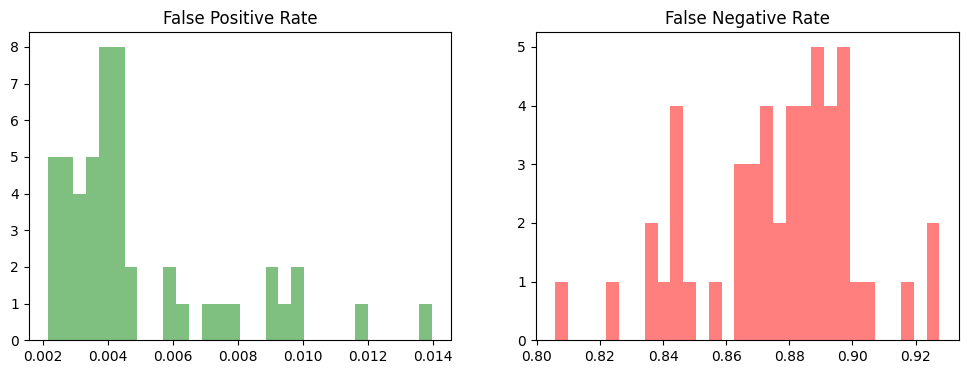

In [ ]:
data = data_orig

orig_FPR = data['FPR']
orig_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

## Random Undersampling (RUS):

SRS Random Undersampling performance:

Error type: FPR
Mean: 0.18199856733524353
Variance: 0.00041922895852703206
Variance of estimate: 8.384579170540641e-06
Standard error: 0.0028956137813148774
95% Confidence Interval:  [ 0.17632316432386635 ,  0.1876739703466207 ]
-----------------------------
Error type: FNR
Mean: 0.44713043478260867
Variance: 0.0011713574150517179
Variance of estimate: 2.3427148301034357e-05
Standard error: 0.004840159945811126
95% Confidence Interval:  [ 0.43764372128881884 ,  0.4566171482763985 ]
-----------------------------


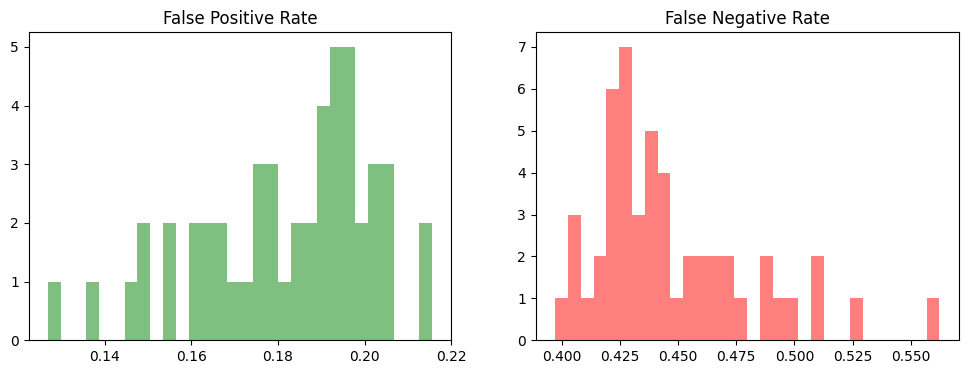

In [ ]:
data = data_SRS

SRS_FPR = data['FPR']
SRS_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

SRSwR undersampling performance:

Error type: FPR
Mean: 0.15052292263610312
Variance: 0.00019107787099700428
Variance of estimate: 3.821557419940086e-06
Standard error: 0.001954880410649226
95% Confidence Interval:  [ 0.14669135703123062 ,  0.1543544882409756 ]
-----------------------------
Error type: FNR
Mean: 0.3351304347826087
Variance: 0.0010729661492826488
Variance of estimate: 2.1459322985652976e-05
Standard error: 0.004632420855843408
95% Confidence Interval:  [ 0.32605088990515557 ,  0.3442099796600618 ]
-----------------------------


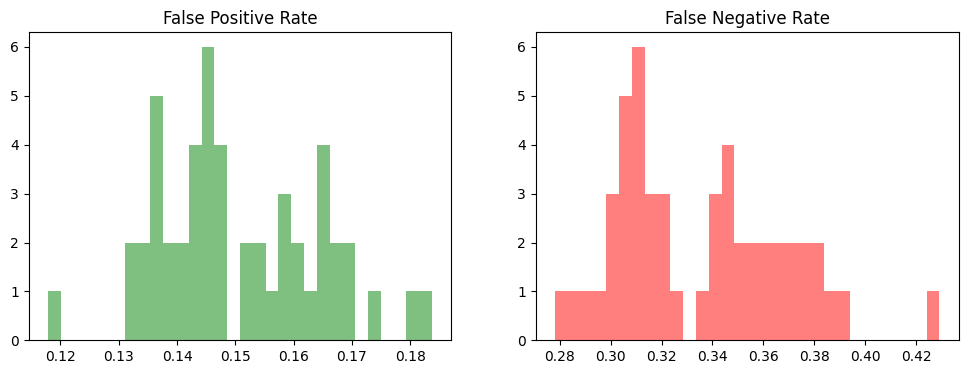

In [ ]:
data = data_SRSwR

SRSwR_FPR = data['FPR']
SRSwR_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

Systematic Undersampling performance:

Error type: FPR
Mean: 0.10588108882521485
Variance: 0.0006230412492005609
Variance of estimate: 1.2460824984011217e-05
Standard error: 0.0035299893744898466
95% Confidence Interval:  [ 0.09896230965121475 ,  0.11279986799921496 ]
-----------------------------
Error type: FNR
Mean: 0.5261449275362319
Variance: 0.004020503324203028
Variance of estimate: 8.041006648406056e-05
Standard error: 0.008967166023000833
95% Confidence Interval:  [ 0.5085692821311503 ,  0.5437205729413135 ]
-----------------------------


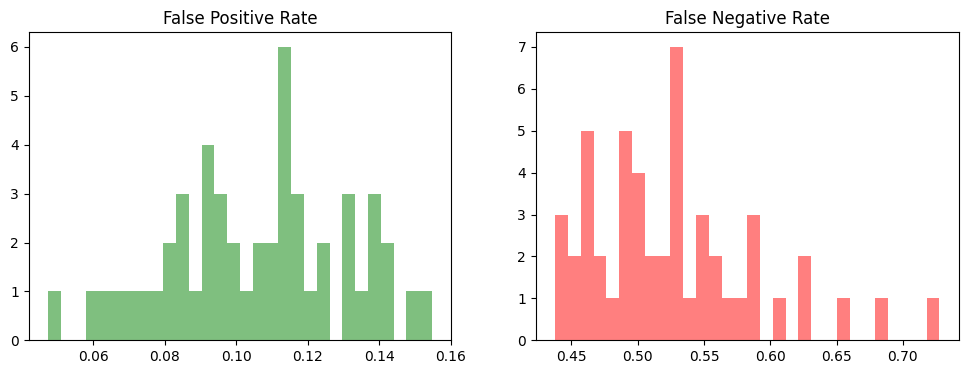

In [ ]:
data = data_Sy

Sy_FPR = data['FPR']
Sy_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

Multiple Systematic undersampling performance:

Error type: FPR
Mean: 0.13141833810888248
Variance: 0.0007553295782397824
Variance of estimate: 1.510659156479565e-05
Standard error: 0.0038867198979082155
95% Confidence Interval:  [ 0.12380036710898237 ,  0.1390363091087826 ]
-----------------------------
Error type: FNR
Mean: 0.3700869565217391
Variance: 0.0018066655521691982
Variance of estimate: 3.613331104338396e-05
Standard error: 0.006011098987987468
95% Confidence Interval:  [ 0.3583052025052837 ,  0.38186871053819454 ]
-----------------------------


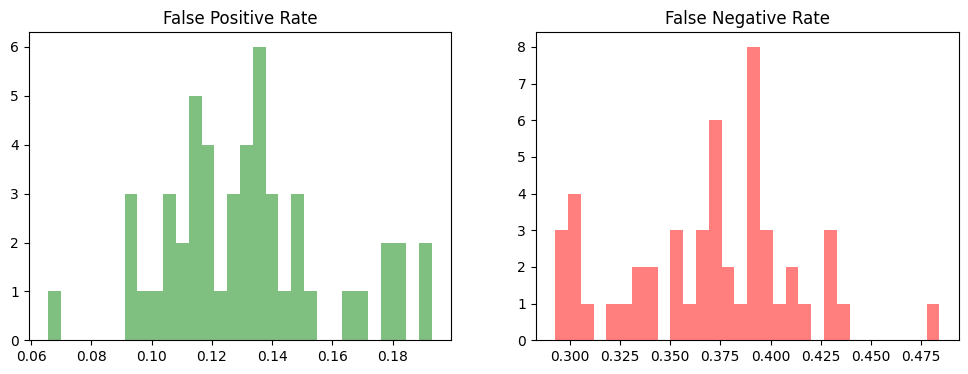

In [ ]:
data = data_Sym

Sym_FPR = data['FPR']
Sym_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

## Random Oversampling (ROS):

SRS Oversampling performance:

Error type: FPR
Mean: 0.1400644699140401
Variance: 0.0004311954079831453
Variance of estimate: 8.623908159662906e-06
Standard error: 0.002936649137990936
95% Confidence Interval:  [ 0.13430863760357786 ,  0.14582030222450232 ]
-----------------------------
Error type: FNR
Mean: 0.30428985507246376
Variance: 0.0012902417173548681
Variance of estimate: 2.580483434709736e-05
Standard error: 0.005079845897967512
95% Confidence Interval:  [ 0.29433335711244746 ,  0.31424635303248005 ]
-----------------------------


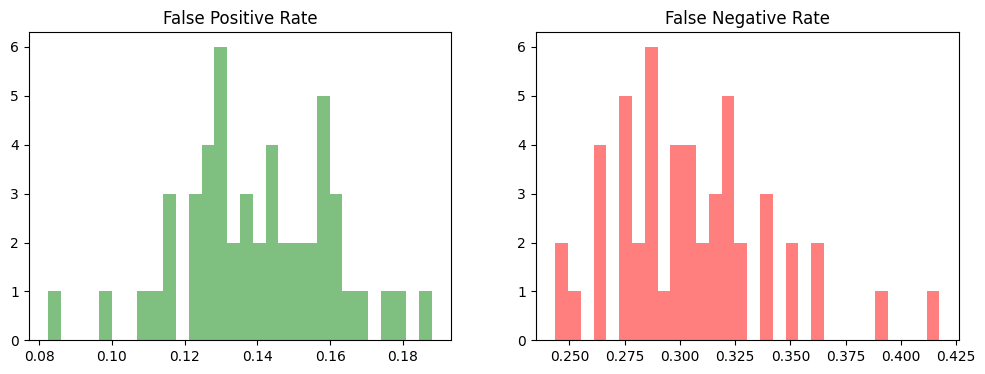

In [ ]:
data = data_SRS_ROS

SRS_ROS_FPR = data['FPR']
SRS_ROS_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

Systematic Resampling performance:

Error type: FPR
Mean: 0.13611031518624642
Variance: 0.0010145275125920516
Variance of estimate: 2.029055025184103e-05
Standard error: 0.004504503330206453
95% Confidence Interval:  [ 0.12728148865904176 ,  0.14493914171345107 ]
-----------------------------
Error type: FNR
Mean: 0.35872463768115936
Variance: 0.002190779676710004
Variance of estimate: 4.381559353420008e-05
Standard error: 0.0066193348256603605
95% Confidence Interval:  [ 0.34575074142286505 ,  0.3716985339394537 ]
-----------------------------


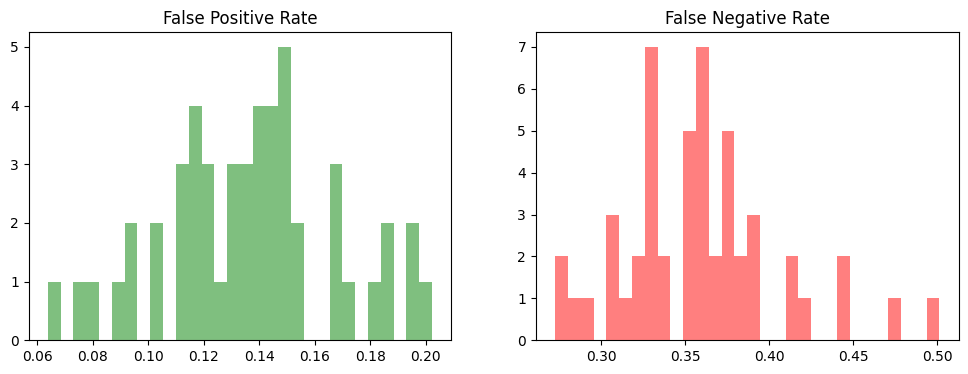

In [ ]:
data = data_Sy_ROS

Sy_ROS_FPR = data['FPR']
Sy_ROS_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

In [ ]:
FPR = pd.DataFrame()

DF = FPR

DF['Orig'] = orig_FPR
DF['SRS_RUS'] = SRS_FPR
DF['SRSwR_RUS'] = SRSwR_FPR
DF['Sy_RUS'] = Sy_FPR
DF['Sy_m_RUS'] = Sym_FPR
DF['SRS_ROS'] = SRS_ROS_FPR
DF['Sy_ROS'] = Sy_ROS_FPR

<Axes: title={'center': 'FPR'}>

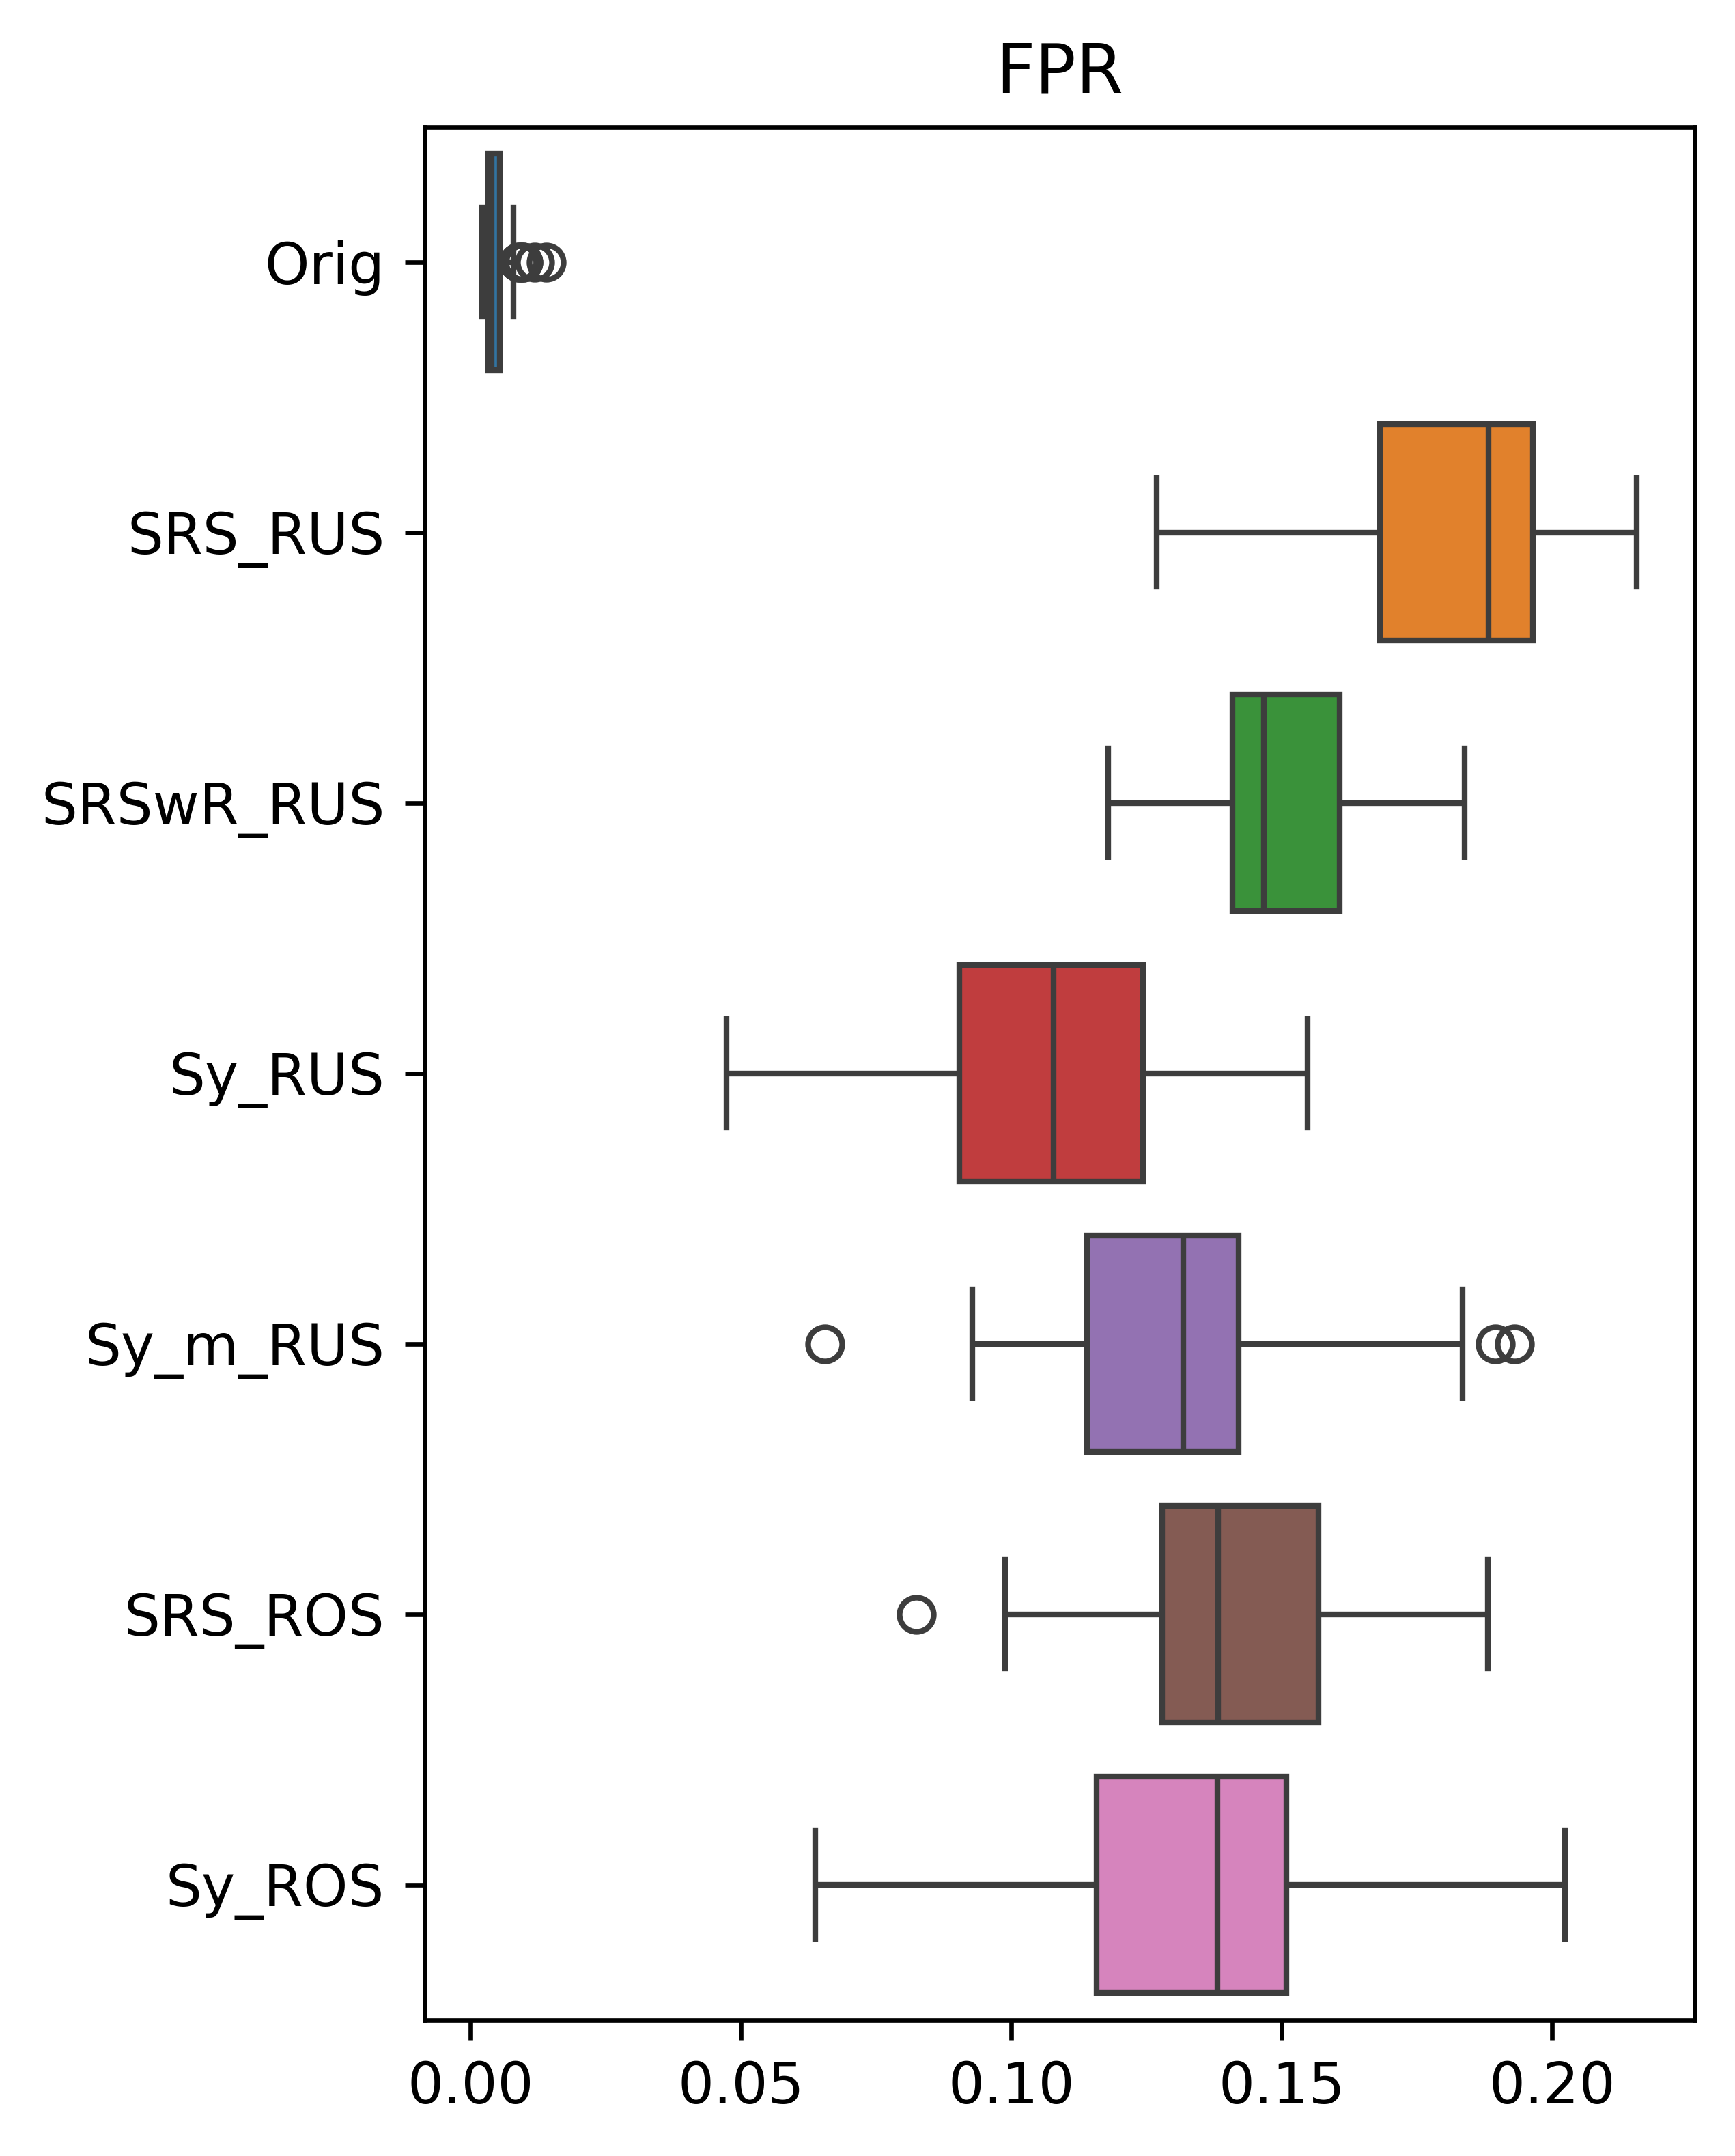

In [ ]:
dataset = FPR

plt.figure(figsize=(4,6), dpi=600)
plt.title('FPR')
sns.boxplot([dataset['Orig'], dataset['SRS_RUS'], dataset['SRSwR_RUS'],
             dataset['Sy_RUS'], dataset['Sy_m_RUS'], dataset['SRS_ROS'], dataset['Sy_ROS']], orient='h')

In [ ]:
FNR = pd.DataFrame()

DF = FNR

DF['Orig'] = orig_FNR
DF['SRS_RUS'] = SRS_FNR
DF['SRSwR_RUS'] = SRSwR_FNR
DF['Sy_RUS'] = Sy_FNR
DF['Sy_m_RUS'] = Sym_FNR
DF['SRS_ROS'] = SRS_ROS_FNR
DF['Sy_ROS'] = Sy_ROS_FNR

<Axes: title={'center': 'FNR'}>

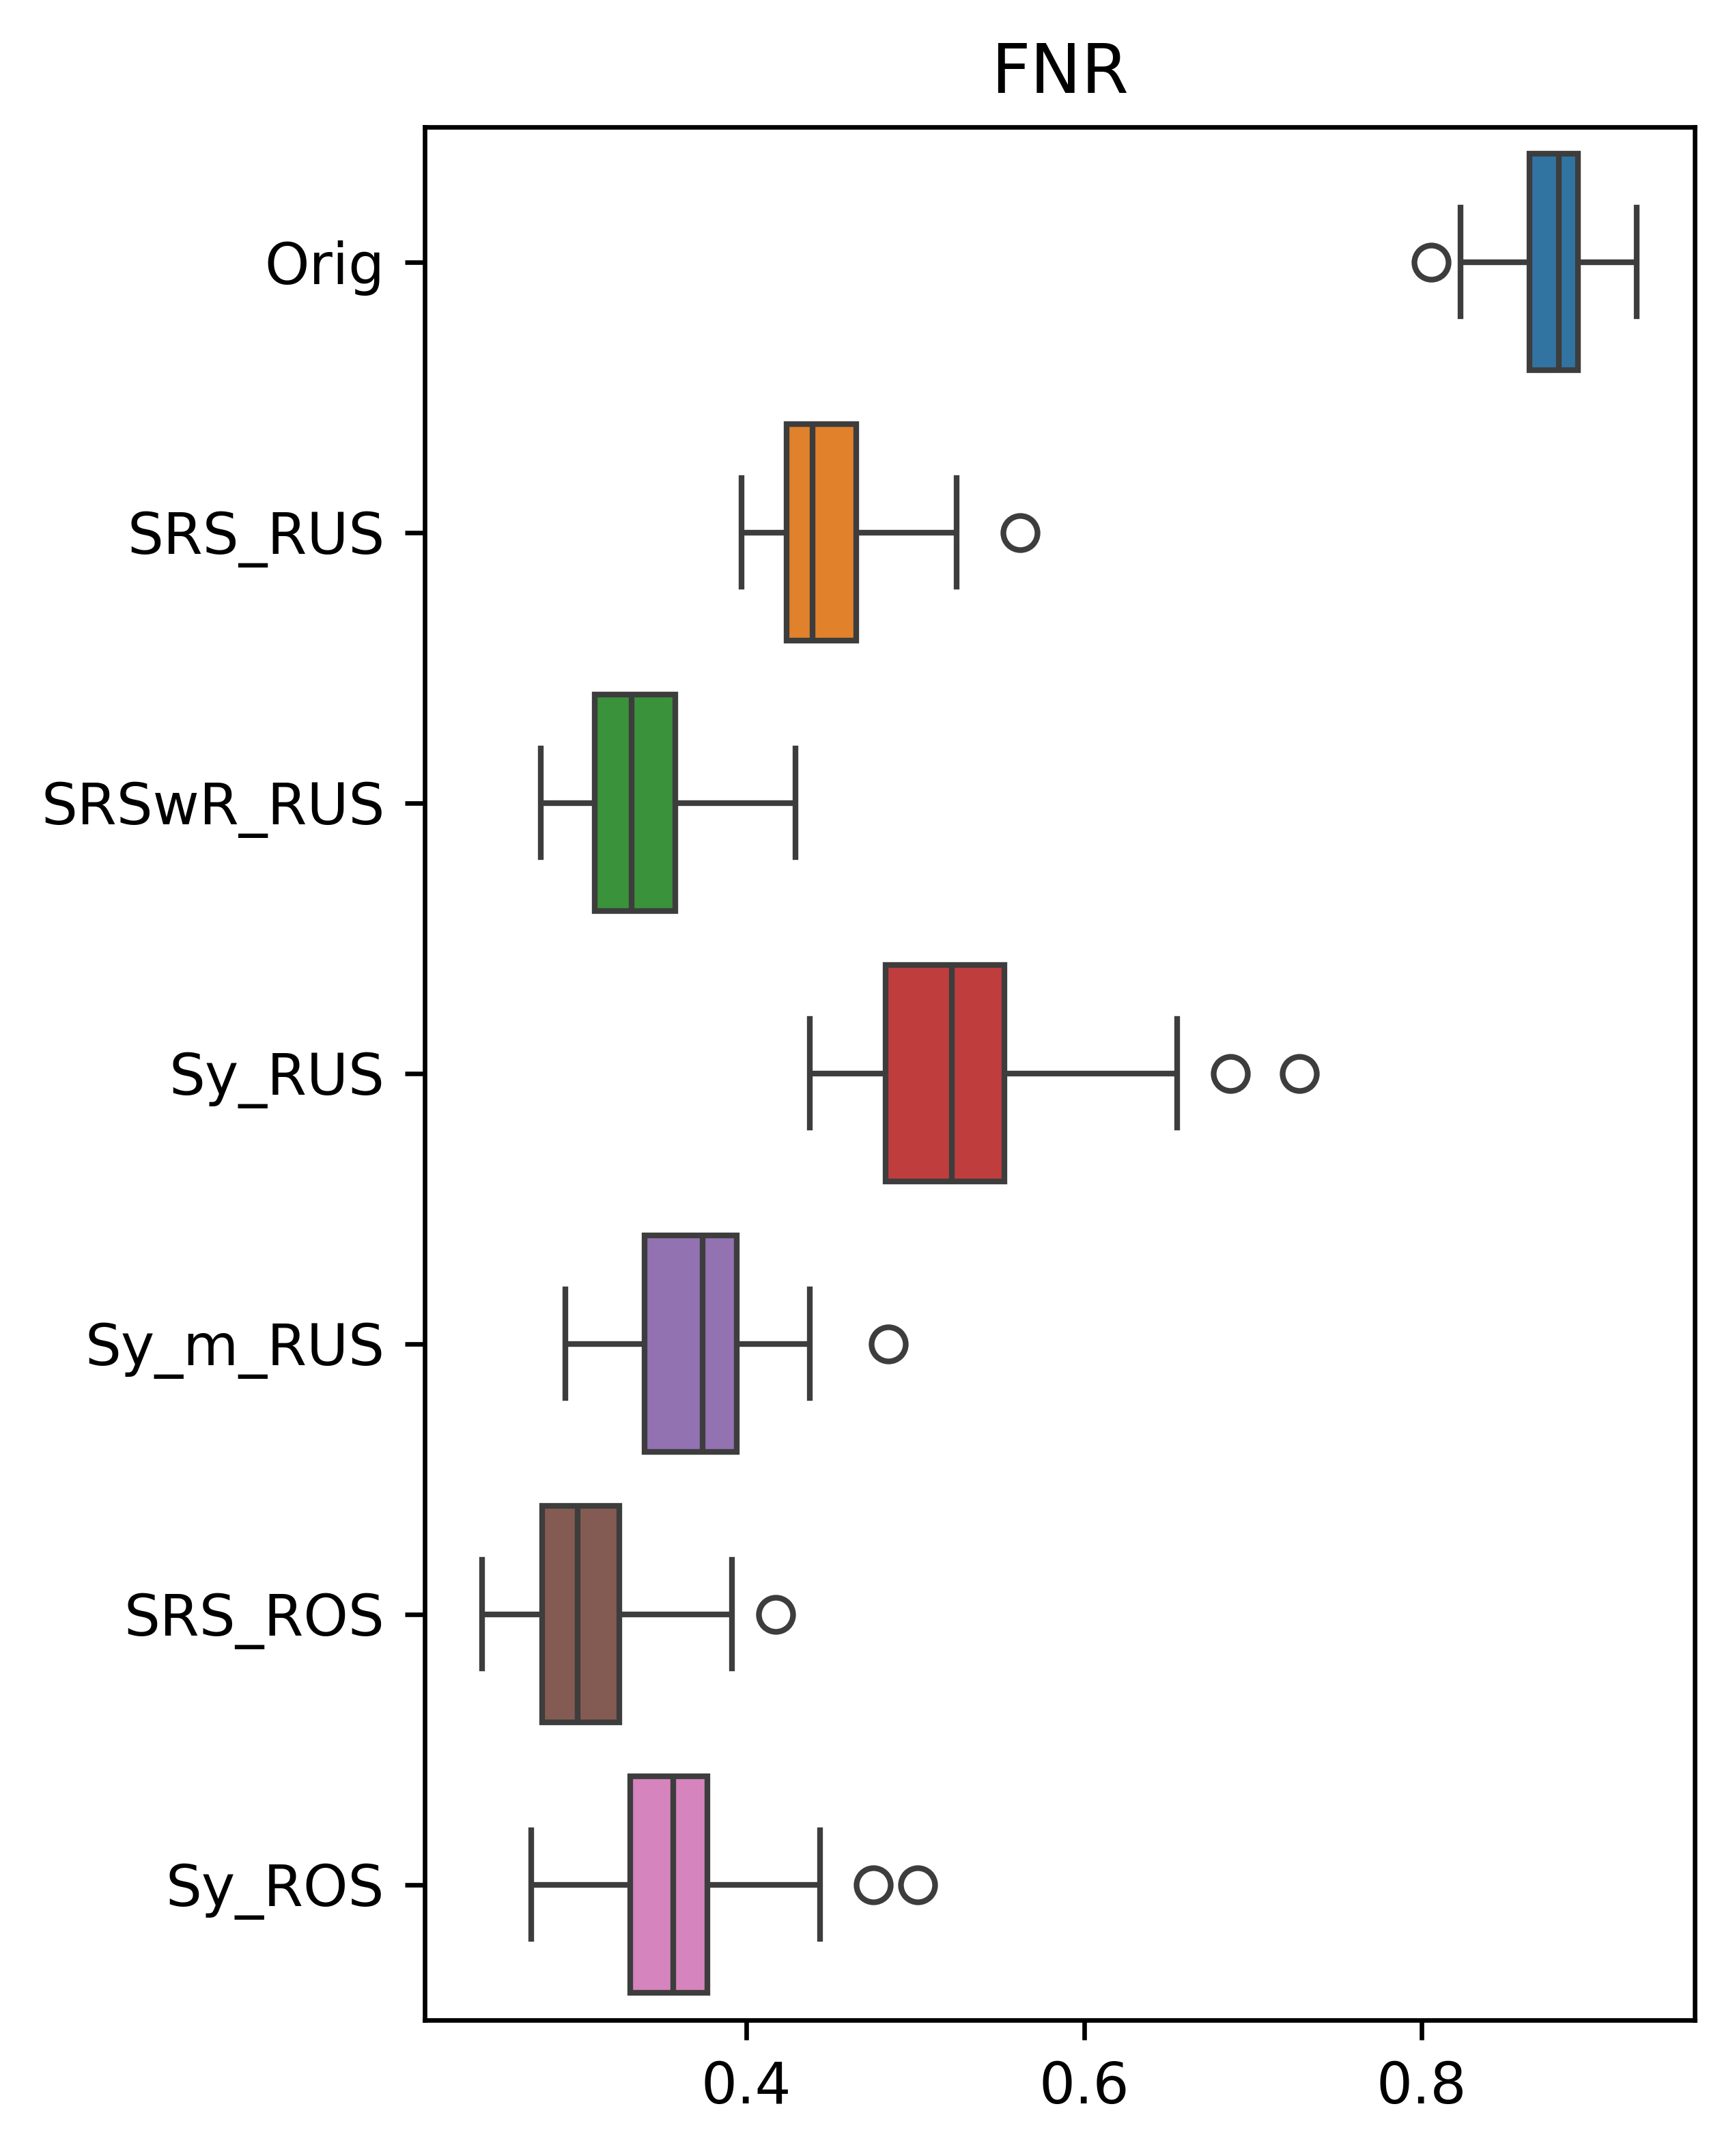

In [ ]:
dataset = FNR

plt.figure(figsize=(4,6), dpi=600)
plt.title('FNR')
sns.boxplot([dataset['Orig'], dataset['SRS_RUS'], dataset['SRSwR_RUS'],
             dataset['Sy_RUS'], dataset['Sy_m_RUS'], dataset['SRS_ROS'], dataset['Sy_ROS']], orient='h')

## Transductive TL performance:

In [4]:
# data_orig = pd.read_csv(path_to_data+"Adult_Imbalanced.csv", sep=",", header=0)
# data_SRS = pd.read_csv(path_to_data+"Adult_SRS_RUS.csv", sep=",", header=0)
# data_SRSwR = pd.read_csv(path_to_data+"Adult_SRSwR_RUS.csv", sep=",", header=0)
# data_Sy = pd.read_csv(path_to_data+"Adult_Sy_RUS.csv", sep=",", header=0)
# data_Sy2 = pd.read_csv(path_to_data+"Adult_Sy2_RUS.csv", sep=",", header=0)
# data_SRS_ROS = pd.read_csv(path_to_data+"Adult_SRS_ROS.csv", sep=",", header=0)
# data_Sy_ROS = pd.read_csv(path_to_data+"Adult_Sy_ROS.csv", sep=",", header=0)

data_orig = pd.read_csv(path_to_data+"Adult_Imbalanced.csv", sep=",", header=0)
data_SRS = pd.read_csv(path_to_data+"Adult_SRS_RUS_Extended.csv", sep=",", header=0)
data_SRSwR = pd.read_csv(path_to_data+"Adult_SRSwR_RUS_Extended.csv", sep=",", header=0)
data_Sy = pd.read_csv(path_to_data+"Adult_Sy_RUS_Extended.csv", sep=",", header=0)
data_Sy2 = pd.read_csv(path_to_data+"Adult_Sy2_RUS_Extended.csv", sep=",", header=0)
data_SRS_ROS = pd.read_csv(path_to_data+"Adult_SRS_ROS_Extended.csv", sep=",", header=0)
data_Sy_ROS = pd.read_csv(path_to_data+"Adult_Sy_ROS_Extended.csv", sep=",", header=0)

data_SRS

,Unnamed: 0,Source time,FPR,TPR,FNR,TNR,Target time
0,0,18.303071,0.124892,0.506336,0.493664,0.875108,1.793025
1,1,16.633857,0.223114,0.635945,0.364055,0.776886,1.199840
2,2,17.355280,0.032765,0.392857,0.607143,0.967235,1.715382
3,3,18.062277,0.062303,0.338710,0.661290,0.937697,1.207519
4,4,15.994438,0.054130,0.516129,0.483871,0.945870,1.779479
...,...,...,...,...,...,...,...
95,45,26.469433,0.121881,0.685484,0.314516,0.878119,1.935004
96,46,30.762998,0.003226,0.139401,0.860599,0.996774,1.749799
97,47,29.523205,0.009607,0.285138,0.714862,0.990393,2.137029
98,48,27.659301,0.004588,0.228111,0.771889,0.995412,2.217738


Original (imbalanced) dataset:

In [5]:
print('SRS RUS', len(data_SRS))
print('SRSwR RUS', len(data_SRSwR))
print('Sy RUS', len(data_Sy))
print('Sym RUS', len(data_Sy2))
print('SRS ROS', len(data_SRS_ROS))
print('Sy ROS', len(data_Sy_ROS))



SRS RUS 100
SRSwR RUS 100
Sy RUS 100
Sym RUS 100
SRS ROS 100
Sy ROS 100


In [6]:
orig_FPR = data_orig['FPR']
orig_FNR = data_orig['FNR']
orig_time = data_orig['Source time']


Error type: FPR
Mean: 0.026780900487525044
Variance: 0.002291315120351748
Variance of estimate: 4.582630240703496e-05
Standard error: 0.006769512715626949
95% Confidence Interval:  [ 0.013512655564896224 ,  0.040049145410153864 ]
-----------------------------
Error type: FNR
Mean: 0.7438824884792626
Variance: 0.02575224046540615
Variance of estimate: 0.000515044809308123
Standard error: 0.022694598681362994
95% Confidence Interval:  [ 0.6994010750637911 ,  0.7883639018947342 ]
-----------------------------
Error type: Source time
Mean: 31.093334453439958
Variance: 28.537780406576783
Variance of estimate: 0.5707556081315357
Standard error: 0.7554836915060018
95% Confidence Interval:  [ 29.612586418088195 ,  32.574082488791724 ]
-----------------------------


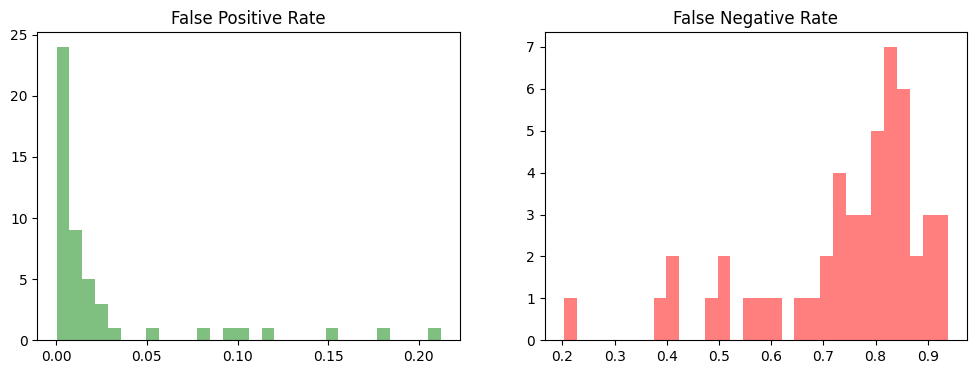

In [7]:
data = data_orig

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

##Random Undersampling (RUS):

SRS undersampling performance:

Error type: FPR
Mean: 0.05816317750000285
Variance: 0.005806332764895927
Variance of estimate: 5.806332764895927e-05
Standard error: 0.0076199296354336025
95% Confidence Interval:  [ 0.04322811541455299 ,  0.07309823958545271 ]
-----------------------------
Error type: FNR
Mean: 0.6320046082840092
Variance: 0.03987724486835674
Variance of estimate: 0.0003987724486835674
Standard error: 0.0199692876358564
95% Confidence Interval:  [ 0.5928648045177306 ,  0.6711444120502877 ]
-----------------------------
Error type: Source time
Mean: 23.55826406953004
Variance: 12.974560924647895
Variance of estimate: 0.12974560924647893
Standard error: 0.36020217829224593
95% Confidence Interval:  [ 22.85226780007724 ,  24.26426033898284 ]
-----------------------------


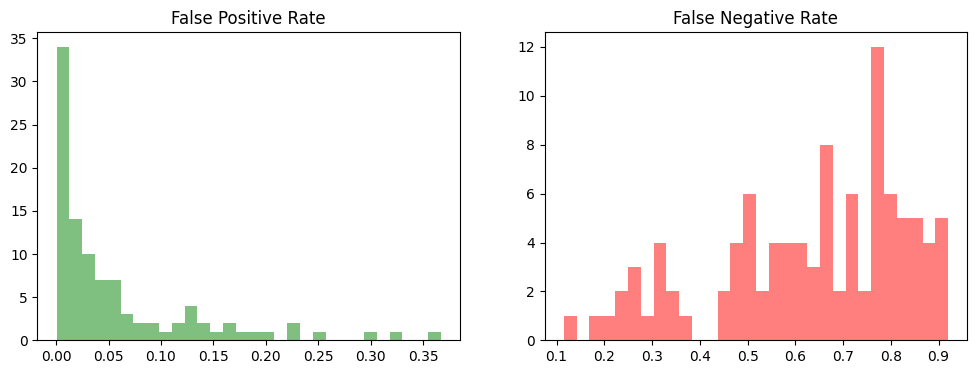

In [8]:
data = data_SRS

SRS_FPR = data['FPR']
SRS_FNR = data['FNR']
SRS_time = data['Source time']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

SRSwR Undersampling performance:

Error type: FPR
Mean: 0.06733725263455118
Variance: 0.013150712693856724
Variance of estimate: 0.00013150712693856724
Standard error: 0.011467655686258078
95% Confidence Interval:  [ 0.044860647489485345 ,  0.089813857779617 ]
-----------------------------
Error type: FNR
Mean: 0.6250864055187556
Variance: 0.05169338546222686
Variance of estimate: 0.0005169338546222686
Standard error: 0.022736179420084383
95% Confidence Interval:  [ 0.5805234938553903 ,  0.669649317182121 ]
-----------------------------
Error type: Source time
Mean: 22.80153695944
Variance: 12.420702243012961
Variance of estimate: 0.12420702243012961
Standard error: 0.35243016674247624
95% Confidence Interval:  [ 22.110773832624748 ,  23.492300086255252 ]
-----------------------------


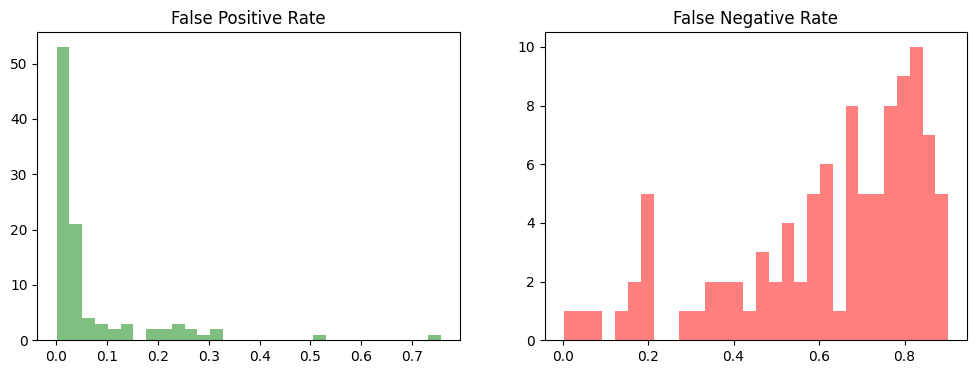

In [9]:
data = data_SRSwR

SRSwR_FPR = data['FPR']
SRSwR_FNR = data['FNR']
SRSwR_time = data['Source time']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

Systematic Undersampling performance:

Error type: FPR
Mean: 0.05124677376065384
Variance: 0.006610672732790344
Variance of estimate: 6.610672732790344e-05
Standard error: 0.00813060436424645
95% Confidence Interval:  [ 0.035310789206730794 ,  0.06718275831457689 ]
-----------------------------
Error type: FNR
Mean: 0.6648329493178341
Variance: 0.03916784817638048
Variance of estimate: 0.00039167848176380475
Standard error: 0.019790868646014623
95% Confidence Interval:  [ 0.6260428467716455 ,  0.7036230518640227 ]
-----------------------------
Error type: Source time
Mean: 23.010542003650027
Variance: 10.333364818041618
Variance of estimate: 0.10333364818041618
Standard error: 0.321455515087883
95% Confidence Interval:  [ 22.380489194077775 ,  23.64059481322228 ]
-----------------------------


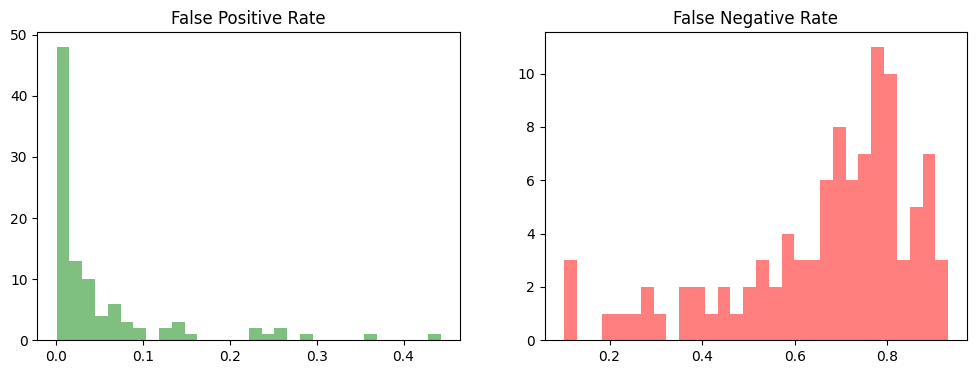

In [10]:
data = data_Sy

Sy_FPR = data['FPR']
Sy_FNR = data['FNR']
Sy_time = data['Source time']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

Multiple Systematic Undersampling performance:

In [11]:
data_Sy2

,Unnamed: 0,Source time,FPR,TNR,FNR,TPR,Target time
0,0,15.716550,0.004373,0.995627,0.820853,0.179147,1.162152
1,1,16.782630,0.006883,0.993117,0.854839,0.145161,1.812456
2,2,17.794265,0.001075,0.998925,0.904378,0.095622,1.299881
3,3,15.260581,0.067752,0.932248,0.482719,0.517281,1.780965
4,4,17.468869,0.084600,0.915400,0.509217,0.490783,1.196778
...,...,...,...,...,...,...,...
95,45,25.945357,0.073631,0.926369,0.432028,0.567972,1.894543
96,46,26.598388,0.043519,0.956481,0.550115,0.449885,1.779075
97,47,25.674172,0.018282,0.981718,0.714286,0.285714,1.563924
98,48,24.195498,0.004875,0.995125,0.804147,0.195853,3.031811


Error type: FPR
Mean: 0.0666812446575939
Variance: 0.01128577281839628
Variance of estimate: 0.0001128577281839628
Standard error: 0.010623451801743292
95% Confidence Interval:  [ 0.045859279126177044 ,  0.08750321018901075 ]
-----------------------------
Error type: FNR
Mean: 0.6188076036766821
Variance: 0.04439113345687525
Variance of estimate: 0.00044391133456875254
Standard error: 0.021069203463082144
95% Confidence Interval:  [ 0.5775119648890411 ,  0.6601032424643231 ]
-----------------------------
Error type: Source time
Mean: 23.793176767679952
Variance: 22.866981645982776
Variance of estimate: 0.22866981645982776
Standard error: 0.4781943291799138
95% Confidence Interval:  [ 22.85591588248732 ,  24.730437652872585 ]
-----------------------------


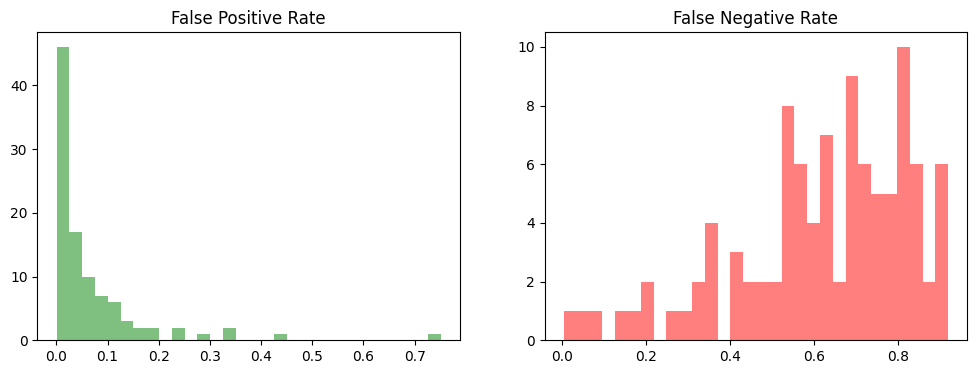

In [12]:
data = data_Sy2

Sy2_FPR = data['FPR']
Sy2_FNR = data['FNR']
Sy2_time = data['Source time']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

## Random Oversampling (ROS):

SRS Oversampling performance:

Error type: FPR
Mean: 0.06046673360235445
Variance: 0.0062405603212161015
Variance of estimate: 6.240560321216102e-05
Standard error: 0.00789972171738733
95% Confidence Interval:  [ 0.04498327903627529 ,  0.07595018816843362 ]
-----------------------------
Error type: FNR
Mean: 0.6204320276610138
Variance: 0.03974863024890589
Variance of estimate: 0.0003974863024890589
Standard error: 0.019937058521483527
95% Confidence Interval:  [ 0.581355392958906 ,  0.6595086623631216 ]
-----------------------------
Error type: Source time
Mean: 46.13460133040998
Variance: 36.374527845635534
Variance of estimate: 0.36374527845635535
Standard error: 0.603112989792423
95% Confidence Interval:  [ 44.95249987041683 ,  47.31670279040313 ]
-----------------------------


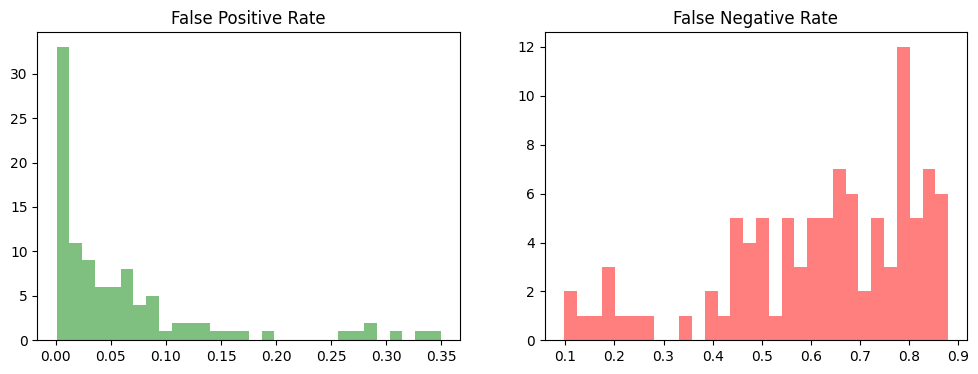

In [13]:
data = data_SRS_ROS

SRS_ROS_FPR = data['FPR']
SRS_ROS_FNR = data['FNR']
SRS_ROS_time = data['Source time']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

Systematic Resampling performance:

In [14]:
data_Sy_ROS

,Unnamed: 0,Source time,FPR,TNR,FNR,TPR,Target time
0,0,36.675036,0.023301,0.976699,0.740783,0.259217,1.671912
1,1,35.367708,0.254373,0.745627,0.115783,0.884217,1.161786
2,2,47.703464,0.025738,0.974262,0.659562,0.340438,1.237285
3,3,36.282060,0.016777,0.983223,0.657834,0.342166,1.228638
4,4,39.698375,0.004373,0.995627,0.833525,0.166475,1.247540
...,...,...,...,...,...,...,...
95,45,51.294530,0.072484,0.927516,0.588710,0.411290,3.055822
96,46,49.584492,0.124606,0.875394,0.407834,0.592166,1.873747
97,47,66.481690,0.051047,0.948953,0.588710,0.411290,1.896121
98,48,50.759811,0.022297,0.977703,0.714286,0.285714,1.561452


Error type: FPR
Mean: 0.04692500720962143
Variance: 0.004473385028053446
Variance of estimate: 4.473385028053446e-05
Standard error: 0.006688336884497854
95% Confidence Interval:  [ 0.03381586691600563 ,  0.060034147503237226 ]
-----------------------------
Error type: FNR
Mean: 0.6594066820278802
Variance: 0.03310751212156604
Variance of estimate: 0.0003310751212156604
Standard error: 0.01819546979925664
95% Confidence Interval:  [ 0.6237435612213372 ,  0.6950698028344232 ]
-----------------------------
Error type: Source time
Mean: 46.60815512315994
Variance: 33.318145227799846
Variance of estimate: 0.33318145227799845
Standard error: 0.5772187213509264
95% Confidence Interval:  [ 45.47680642931212 ,  47.73950381700776 ]
-----------------------------


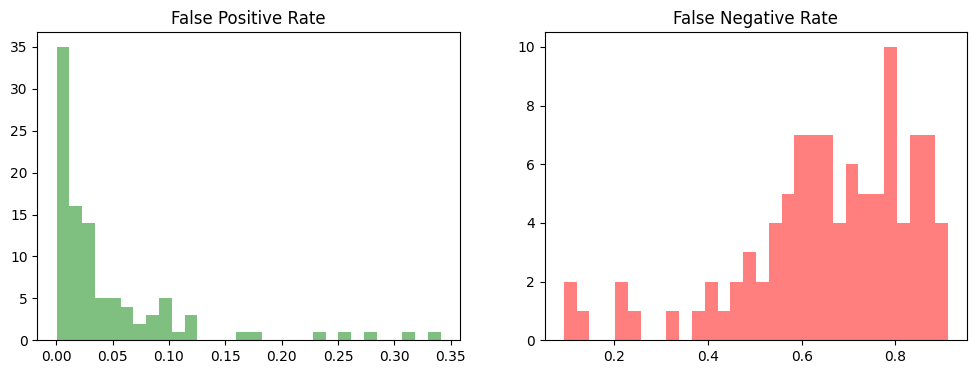

In [15]:
data = data_Sy_ROS

Sy_ROS_FPR = data['FPR']
Sy_ROS_FNR = data['FNR']
Sy_ROS_time = data['Source time']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

In [ ]:
FPR = pd.DataFrame()

DF = FPR

DF['Orig'] = orig_FPR
DF['SRS_RUS'] = SRS_FPR
DF['SRSwR_RUS'] = SRSwR_FPR
DF['Sy_RUS'] = Sy_FPR
DF['Sy_m_RUS'] = Sy2_FPR
DF['SRS_ROS'] = SRS_ROS_FPR
DF['Sy_ROS'] = Sy_ROS_FPR

<Axes: title={'center': 'FPR'}>

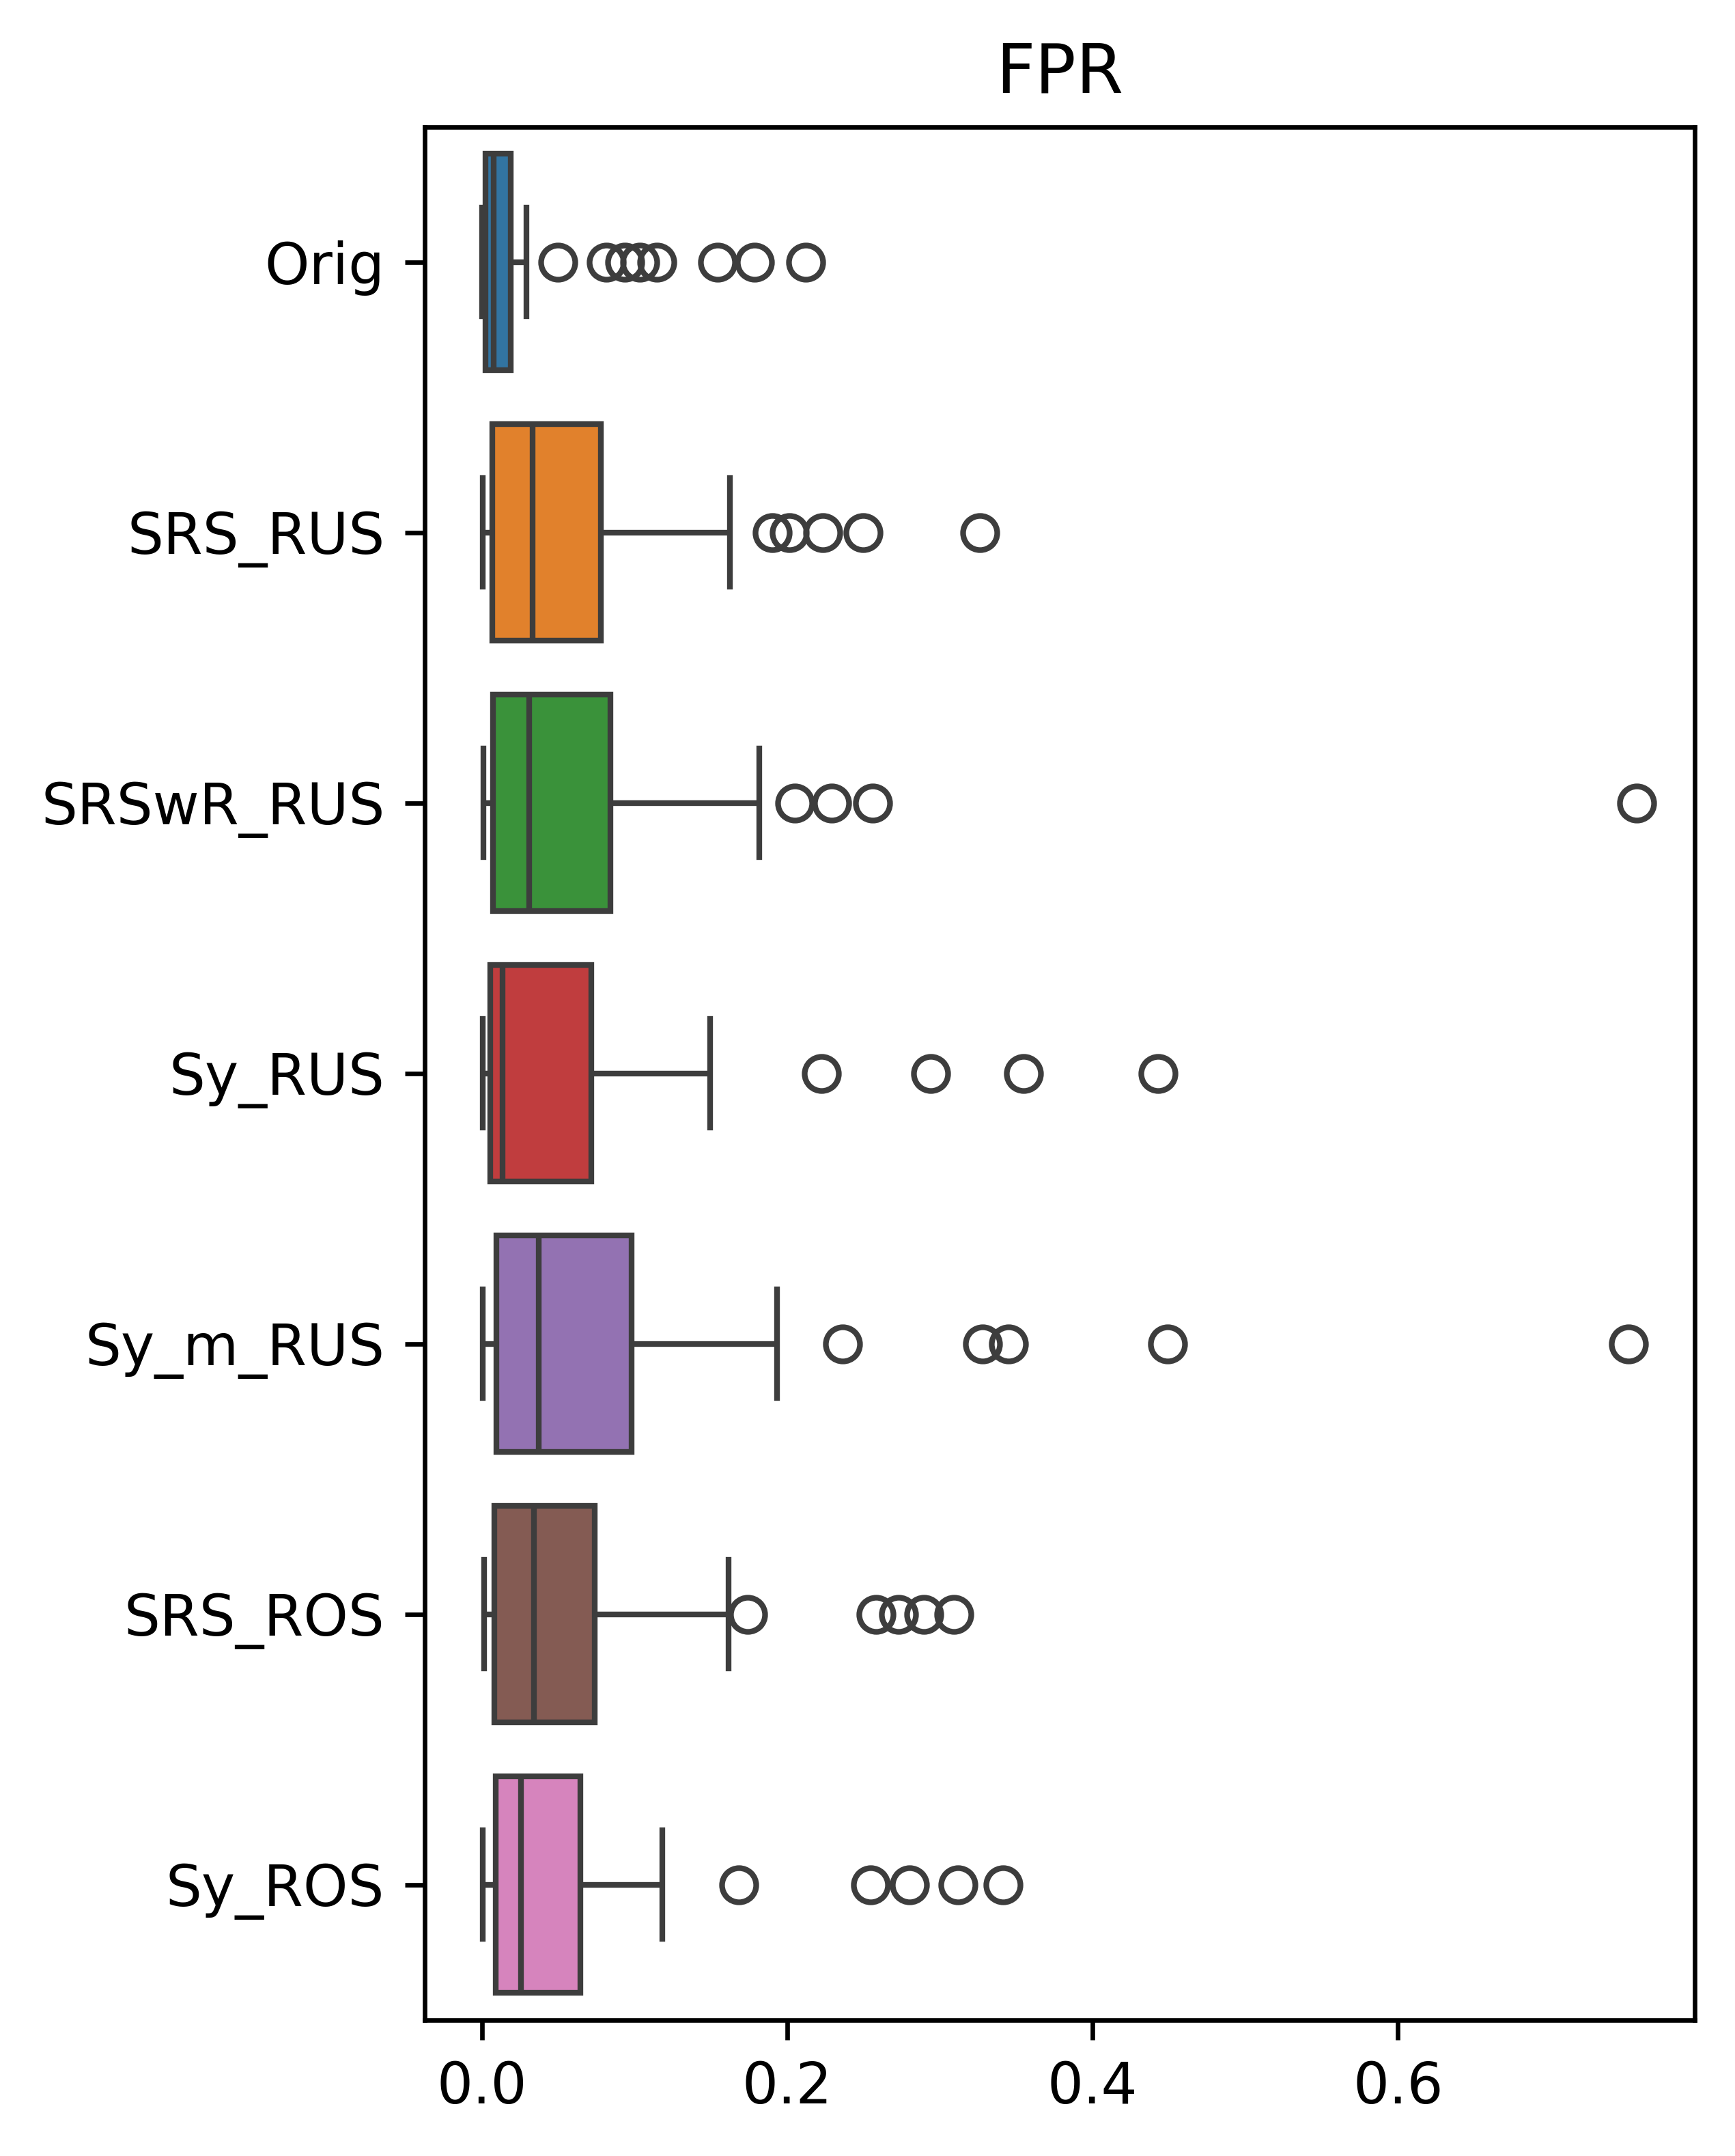

In [ ]:
dataset = FPR

plt.figure(figsize=(4,6), dpi=600)
plt.title('FPR')
sns.boxplot([dataset['Orig'], dataset['SRS_RUS'], dataset['SRSwR_RUS'],
             dataset['Sy_RUS'], dataset['Sy_m_RUS'], dataset['SRS_ROS'], dataset['Sy_ROS']], orient='h')

In [ ]:
FNR = pd.DataFrame()

DF = FNR

DF['Orig'] = orig_FNR
DF['SRS_RUS'] = SRS_FNR
DF['SRSwR_RUS'] = SRSwR_FNR
DF['Sy_RUS'] = Sy_FNR
DF['Sy_m_RUS'] = Sy2_FNR
DF['SRS_ROS'] = SRS_ROS_FNR
DF['Sy_ROS'] = Sy_ROS_FNR

<Axes: title={'center': 'FNR'}>

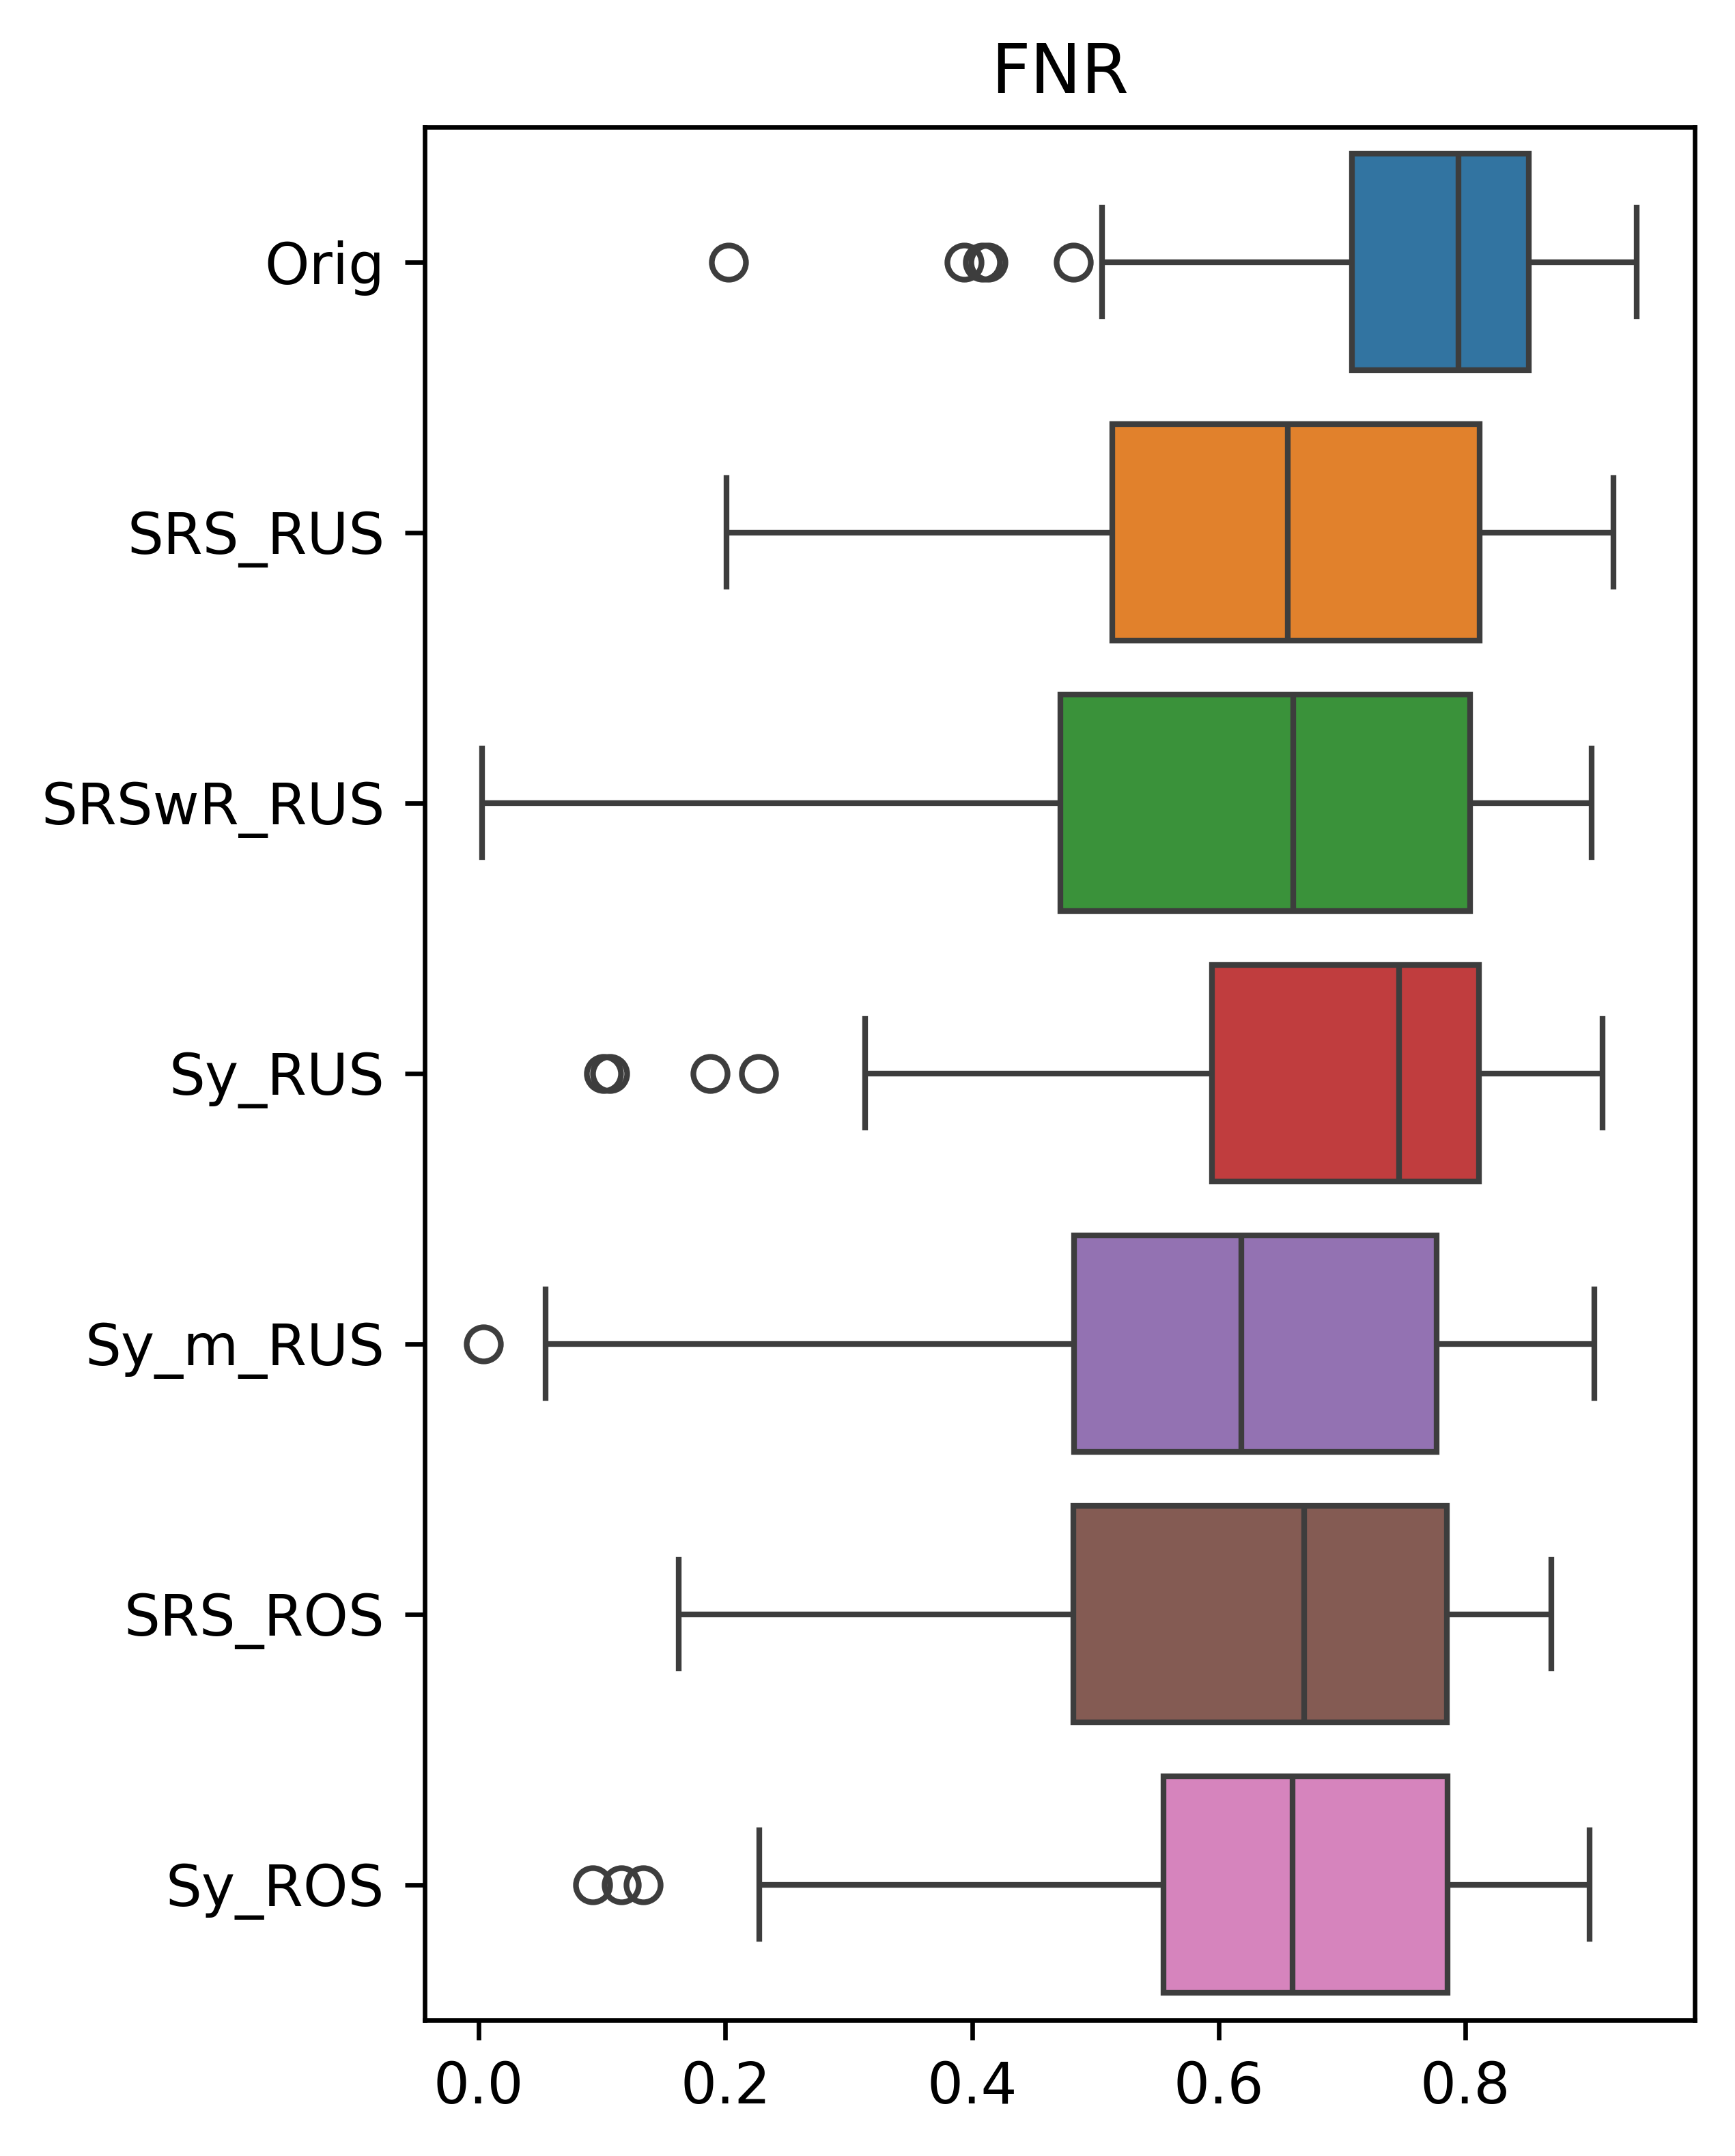

In [ ]:
dataset = FNR

plt.figure(figsize=(4,6), dpi=600)
plt.title('FNR')
sns.boxplot([dataset['Orig'], dataset['SRS_RUS'], dataset['SRSwR_RUS'],
             dataset['Sy_RUS'], dataset['Sy_m_RUS'], dataset['SRS_ROS'], dataset['Sy_ROS']], orient='h')

In [ ]:
Time = pd.DataFrame()

DF = FNR

DF['Orig'] = orig_time
DF['SRS_RUS'] = SRS_time
DF['SRSwR_RUS'] = SRSwR_time
DF['Sy_RUS'] = Sy_time
DF['Sy_m_RUS'] = Sy2_time
DF['SRS_ROS'] = SRS_ROS_time
DF['Sy_ROS'] = Sy_ROS_time

<Axes: title={'center': 'Training Time'}>

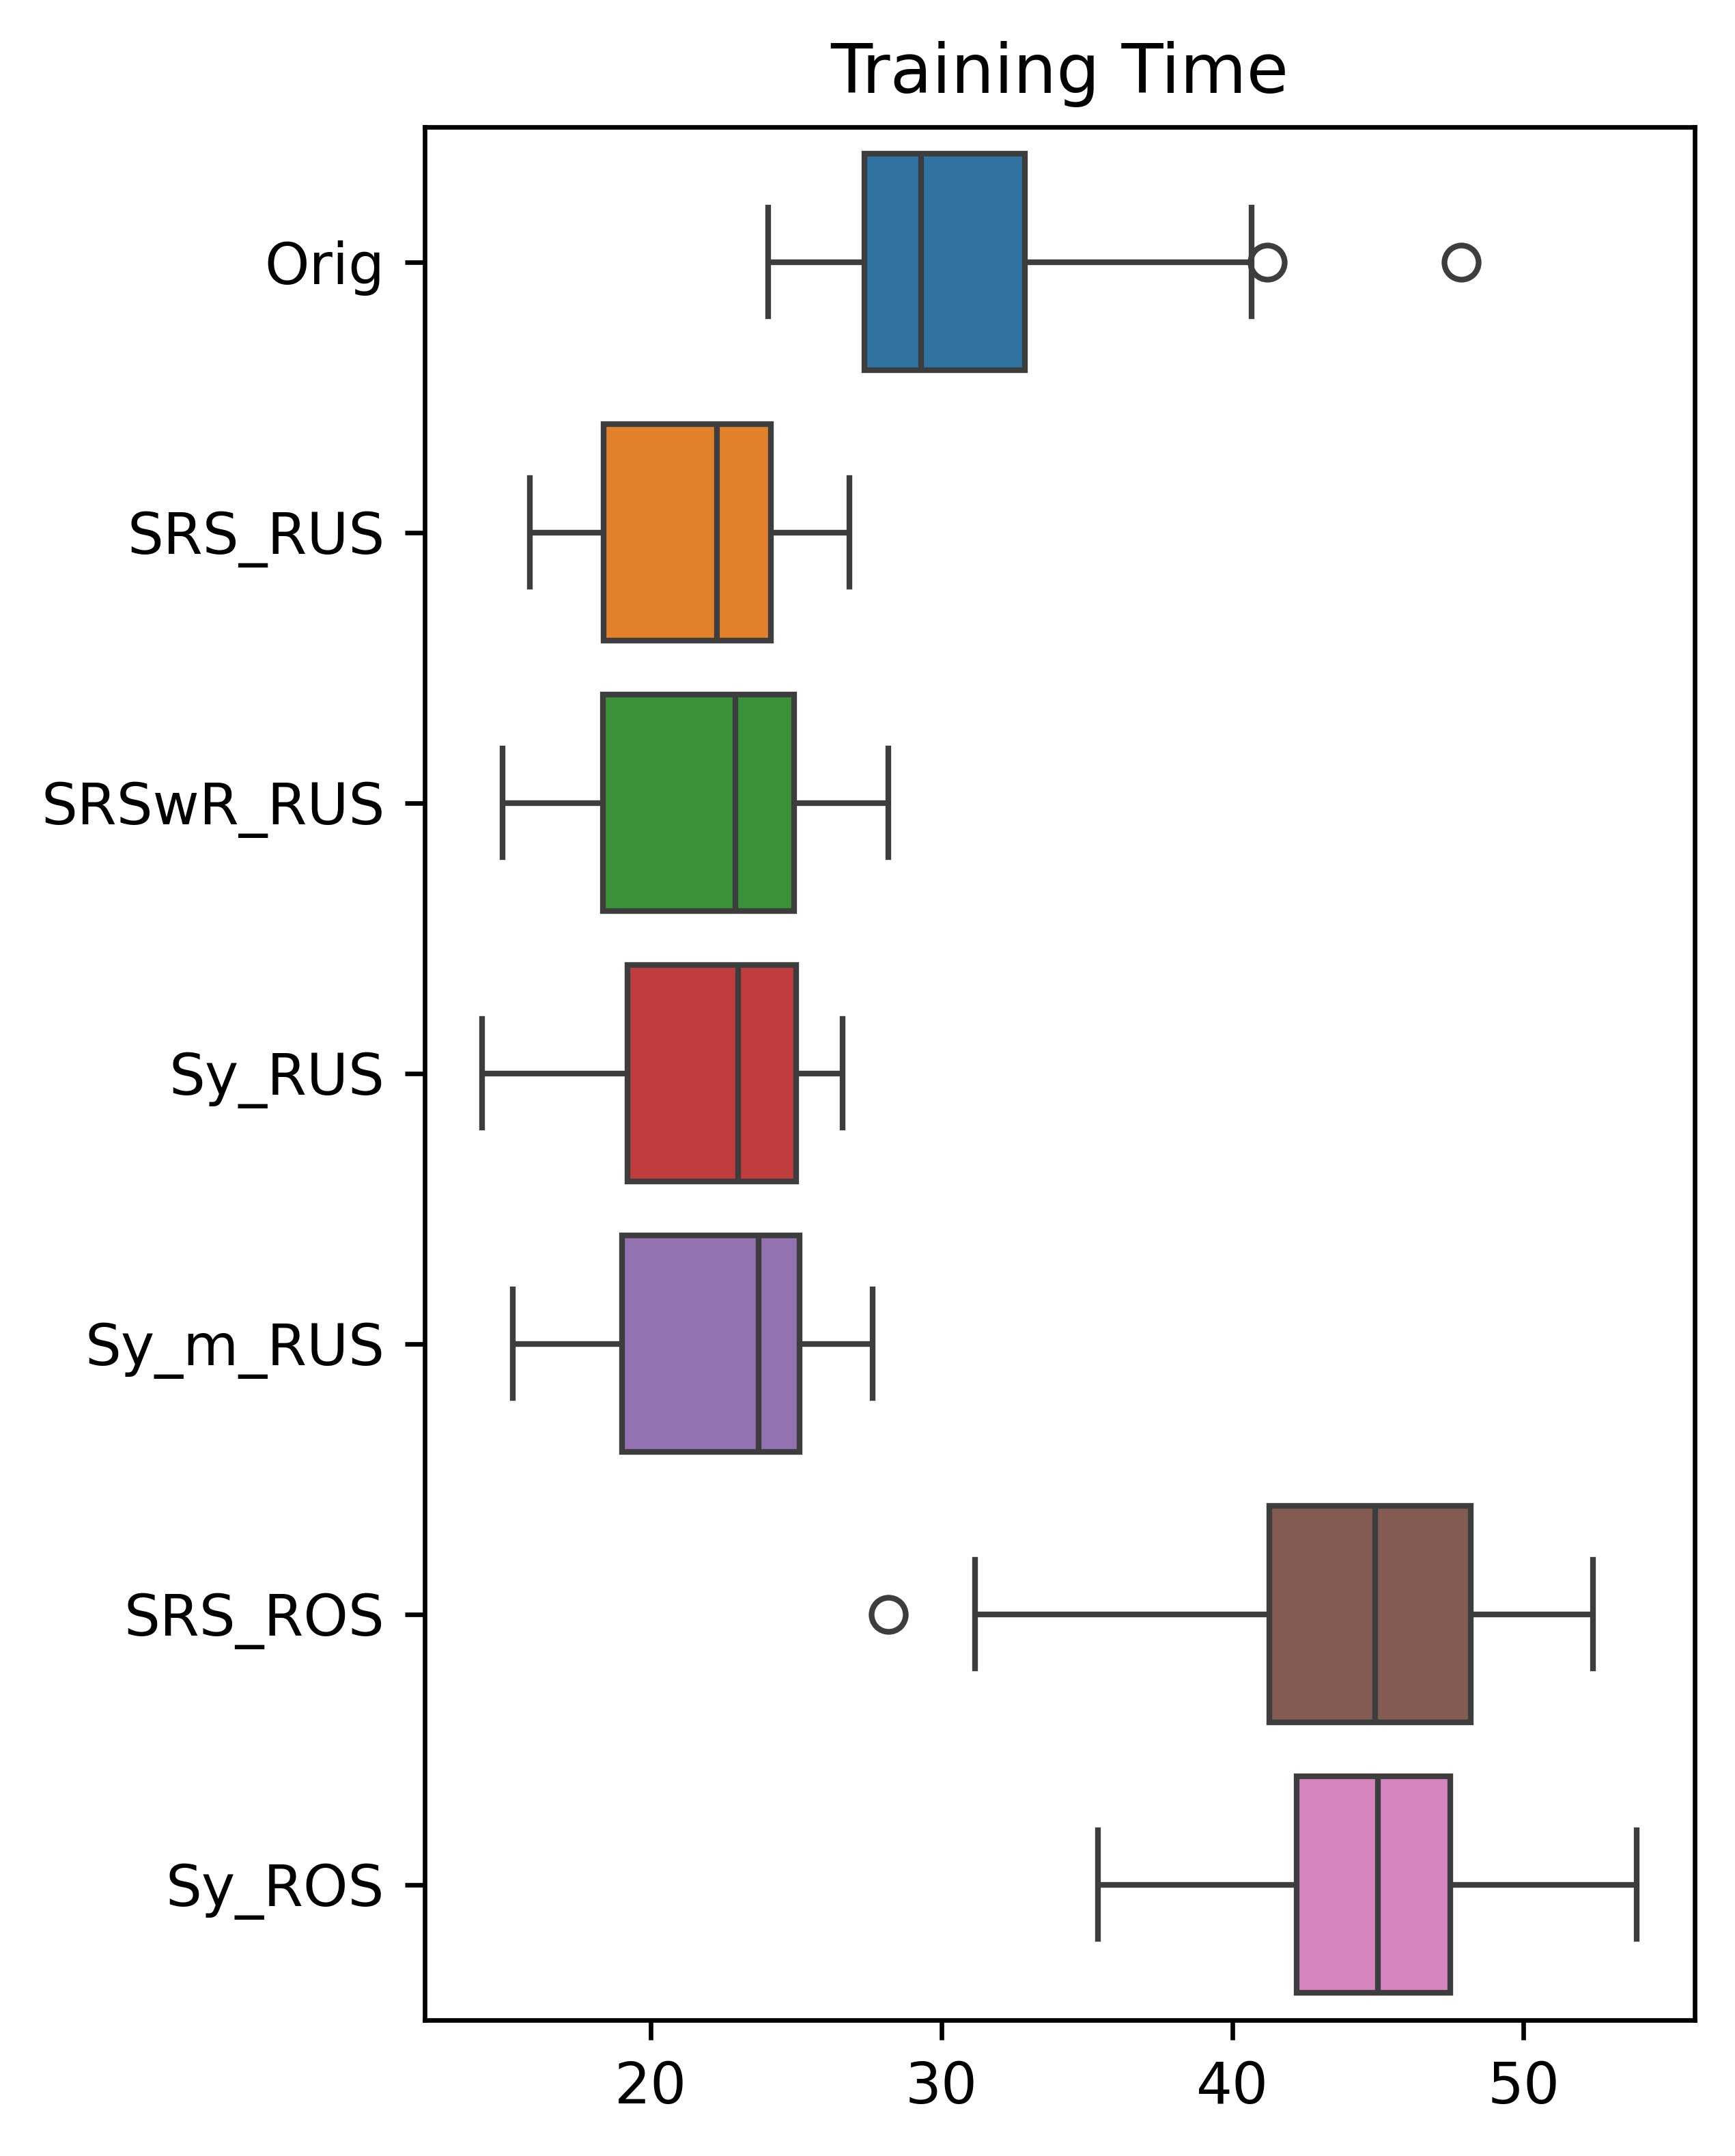

In [ ]:
dataset = DF

plt.figure(figsize=(4,6), dpi=600)
plt.title('Training Time')
sns.boxplot([dataset['Orig'], dataset['SRS_RUS'], dataset['SRSwR_RUS'],
             dataset['Sy_RUS'], dataset['Sy_m_RUS'], dataset['SRS_ROS'], dataset['Sy_ROS']], orient='h')